<a href="https://colab.research.google.com/github/wzz010624/Scigraphexp/blob/main/merged_network_with_feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
with open('/content/drive/MyDrive/GNNdataset/coauthor_dict.pickle', 'rb') as f:
    coauthor_dict = pickle.load(f)

In [ ]:
import pickle
import numpy as np
with open('/content/drive/MyDrive/GNNdataset/author_h_index_sequence.pickle', 'rb') as f:
    author_h_index_sequence = pickle.load(f)
# 保存为二进制文件
with open('/content/drive/MyDrive/GNNdataset/authors_high_impact_sequence.pickle', 'rb') as f:
    authors_high_impact_sequence = pickle.load(f)

# 保存为二进制文件
with open('/content/drive/MyDrive/GNNdataset/author_publication_sequence.pickle', 'rb') as f:
    author_publication_sequence = pickle.load(f)

# 保存为二进制文件
with open('/content/drive/MyDrive/GNNdataset/author_citation_sequence.pickle', 'rb') as f:
    author_citation_sequence = pickle.load(f)

In [ ]:
import pickle
#coauthor_dict[author_id][coauthor_id][paper_year] = [paper_id]
# 保存为二进制文件
with open('/content/drive/MyDrive/GNNdataset/merged_network', 'rb') as f:
    merged_network = pickle.load(f)

In [ ]:
import pickle
#coauthor_dict[author_id][coauthor_id][paper_year] = [paper_id]
# 保存为二进制文件
with open('/content/drive/MyDrive/GNNdataset/target_authors_by_year', 'rb') as f:
    target_authors_by_year = pickle.load(f)

In [ ]:
graph = merged_network
year = 2011
print(f"Year: {year}, Nodes: {graph.number_of_nodes()}, Edges: {graph.number_of_edges()}")

Year: 2011, Nodes: 726152, Edges: 2494234


In [ ]:
coauthor_networks = merged_network

In [ ]:
def calculate_coauthors(author_id, current_year):
    unique_coauthors = set()
    for coauthor_id in coauthor_dict[author_id]:
        for year, paper_ids in coauthor_dict[author_id][coauthor_id].items():
            if year <= current_year:
                unique_coauthors.add(coauthor_id)

    total_coauthors = len(unique_coauthors)
    return total_coauthors

def list_coauthors(author_id, current_year):
    unique_coauthors = set()
    for coauthor_id in coauthor_dict[author_id]:
        for year, paper_ids in coauthor_dict[author_id][coauthor_id].items():
            if year <= current_year:
                unique_coauthors.add(coauthor_id)
    return list(unique_coauthors)

def calculate_average(dct, end_year, start_year=0):
    if len(dct) == 0:
        return 0

    total = 0
    count_years = end_year - start_year + 1
    for year in range(start_year, end_year + 1):
        total += dct.get(year, 0)

    return total / count_years if count_years > 0 else 0

def gini_coefficient(x):
    x = np.array(x)
    x = x[x != 0]  # Remove zero values to avoid skewing the result
    if len(x) == 0:
        return 0  # If all values were zero, return 0 as the Gini coefficient
    x = np.sort(x)  # Sort values in ascending order
    n = len(x)
    cumx = np.cumsum(x, dtype=float)  # Cumulative sum of x
    gini_numerator = (2 * np.arange(1, n + 1) - n - 1) @ x
    gini_denominator = n * np.sum(x)
    return gini_numerator / gini_denominator
    '''n = len(x)
    if n == 0 or sum(x) == 0:  # Add this check to handle empty list or a list with all zeros
        return 0

    x.sort()  # Make sure the list is sorted
    gini_num = sum([(2 * i - n - 1) * x[i] for i in range(n)])
    gini_den = n * sum(x)
    gini = gini_num / gini_den

    return max(0, min(gini, 1))  # ÏÞÖÆGiniÏµÊýÔÚ0ºÍ1Ö®Œä'''

In [ ]:
def calculate_gini_coefficients(author_id, current_year):
    coauthors = list_coauthors(author_id, current_year)
    
    author_career_age = current_year - min(author_publication_sequence[author_id].keys()) + 1
    author_pub_count = sum(v for k, v in author_publication_sequence[author_id].items() if k <= current_year)
    author_citation_count = sum(v for k, v in author_citation_sequence[author_id].items() if k <= current_year)
    author_h_index = author_h_index_sequence[author_id][current_year]
    author_hi_count = sum(v for k, v in authors_high_impact_sequence[author_id].items() if k <= current_year)
    author_col_count = calculate_coauthors(author_id, current_year)
    if author_col_count!=len(coauthors):
        print("wrong")

    career_ages = [author_career_age] + [current_year - min(author_publication_sequence[author_id].keys()) + 1 for author_id in coauthors]
    pub_counts = [author_pub_count] + [sum(v for k, v in author_publication_sequence[author_id].items() if k <= current_year) for author_id in coauthors]
    citation_counts = [author_citation_count] + [sum(v for k, v in author_citation_sequence[author_id].items() if k <= current_year) for author_id in coauthors]
    h_indices = [author_h_index] + [author_h_index_sequence[author_id][current_year] for author_id in coauthors]
    hi_counts = [author_hi_count] + [sum(v for k, v in authors_high_impact_sequence[author_id].items() if k <= current_year) for author_id in coauthors]
    col_counts = [author_col_count] + [calculate_coauthors(author_id, current_year) for author_id in coauthors]

    gini_career_age = gini_coefficient(sorted(career_ages))
    gini_pub_count = gini_coefficient(sorted(pub_counts))
    gini_citation_count = gini_coefficient(sorted(citation_counts))
    gini_h_index = gini_coefficient(sorted(h_indices))
    gini_hi_count = gini_coefficient(sorted(hi_counts))
    gini_col_counts = gini_coefficient(sorted(col_counts))

    return [gini_career_age, gini_pub_count, gini_citation_count, gini_h_index, gini_hi_count, gini_col_counts]

In [ ]:
def generate_node_features(merged_node_id):
    author_id, current_year = merged_node_id.split('_')
    current_year = int(current_year)
    start_year = min(author_publication_sequence[author_id].keys())
    career_age = current_year - start_year + 1

    # Get publication count up to current year
    total_pubs = sum(v for k, v in author_publication_sequence[author_id].items() if k <= current_year)
    avg_pubs = calculate_average(author_publication_sequence[author_id], current_year, start_year)
    # Get citation count up to current year
    total_citations = sum(v for k, v in author_citation_sequence[author_id].items() if k <= current_year)
    avg_citations = calculate_average(author_citation_sequence[author_id], current_year, start_year)

    h_index = author_h_index_sequence[author_id][current_year]

    # Get high impact publication count up to current year
    total_high_impact_pubs = sum(v for k, v in authors_high_impact_sequence[author_id].items() if k <= current_year)
    avg_high_impact_pubs = calculate_average(authors_high_impact_sequence[author_id], current_year, start_year)

    total_coauthors = calculate_coauthors(author_id, current_year)
    avg_coauthors = total_coauthors / career_age if career_age > 0 else 0

    # Calculate early career values
    early_total_pubs, early_total_citations, early_total_high_impact_pubs = 0, 0, 0
    for year in range(start_year, min(start_year + 6, current_year + 1)):
        early_total_pubs += author_publication_sequence[author_id].get(year, 0)
        early_total_citations += author_citation_sequence[author_id].get(year, 0)
        early_total_high_impact_pubs += authors_high_impact_sequence[author_id].get(year, 0)

    early_career_age = min(career_age, 5)
    early_avg_pubs = early_total_pubs / early_career_age if early_career_age > 0 else 0
    early_avg_citations = early_total_citations / early_career_age if early_career_age > 0 else 0
    early_h_index = author_h_index_sequence[author_id][current_year - career_age + 5] if career_age >= 5 else h_index
    early_avg_high_impact_pubs = early_total_high_impact_pubs / early_career_age if early_career_age > 0 else 0
    if early_total_pubs/early_avg_pubs!=early_career_age:
      print("early_career_age",early_career_age,"early_avg_pubs",early_avg_pubs,"early_career_age",early_career_age)
      print("early_career_agewrong")
        
    early_total_coauthors = 0
    unique_coauthors = set()
    for year in range(start_year, min(start_year + 6, current_year + 1)):
        for coauthor_id in coauthor_dict[author_id]:
            if year in coauthor_dict[author_id][coauthor_id]:
                unique_coauthors.add(coauthor_id)
    early_total_coauthors = len(unique_coauthors)
    early_avg_coauthors = early_total_coauthors / early_career_age if early_career_age > 0 else 0

    gini_coefficients = calculate_gini_coefficients(author_id, current_year)

    node_features = [
        total_pubs,
        avg_pubs,
        total_citations,
        avg_citations,
        h_index,
        total_high_impact_pubs,
        avg_high_impact_pubs,
        total_coauthors,
        avg_coauthors,
        early_total_pubs,
        early_avg_pubs,
        early_total_citations,
        early_avg_citations,
        early_h_index,
        early_total_high_impact_pubs,
        early_avg_high_impact_pubs,
        early_total_coauthors,
        early_avg_coauthors,
        career_age,
    ] + gini_coefficients

    return node_features

In [ ]:
def add_node_features_to_merged_network(network):
    node_feature_names = [
        "total_pubs",
        "avg_pubs",
        "total_citations",
        "avg_citations",
        "h_index",
        "total_high_impact_pubs",
        "avg_high_impact_pubs",
        "total_coauthors",
        "avg_coauthors",
        "early_total_pubs",
        "early_avg_pubs",
        "early_total_citations",
        "early_avg_citations",
        "early_h_index",
        "early_total_high_impact_pubs",
        "early_avg_high_impact_pubs",
        "early_total_coauthors",
        "early_avg_coauthors",
        "career_age",
    ] + [f"gini_{i}" for i in range(1, 7)]

    for node_id in network.nodes:
        node_features = generate_node_features(node_id)
        for feature_name, feature_value in zip(node_feature_names, node_features):
            network.nodes[node_id][feature_name] = feature_value

In [ ]:
add_node_features_to_merged_network(merged_network)

In [ ]:
def calculate_edge_features(merged_node_a, merged_node_b, coauthor_dict):
    author_id_a, end_year_a = merged_node_a.split('_')
    author_id_b, end_year_b = merged_node_b.split('_')
    if int(end_year_a)!=int(end_year_b):
      print("wrong")
    end_year = min(int(end_year_a), int(end_year_b))
    collaboration_years = []
    collaboration_counts = []

    for year in coauthor_dict[author_id_a][author_id_b]:
        if year <= end_year:
            collaboration_years.append(year)
            collaboration_counts.append(len(coauthor_dict[author_id_a][author_id_b][year]))

    # Feature 1: Collaboration duration
    collaboration_duration = end_year - min(collaboration_years) + 1

    # Feature 2: Total collaboration count
    total_collaboration_count = sum(collaboration_counts)
    
    if len(collaboration_counts)>1:
        # Feature 3: Collaboration stability
        stability_numerator = sum(abs(collaboration_counts[i + 1] - collaboration_counts[i]) for i in range(len(collaboration_counts) - 1))
        max_collaboration_count = max(collaboration_counts)
        stability_denominator = (len(collaboration_counts) - 1) * (max_collaboration_count + 1)
        collaboration_stability = 1 - stability_numerator / stability_denominator
        if collaboration_stability<0:
            print("wrong")
    else:
        collaboration_stability = 0
    return collaboration_duration, total_collaboration_count, collaboration_stability


def update_merged_network_with_edge_features(network, coauthor_dict):
    for edge in network.edges():
        merged_node_a, merged_node_b = edge
        edge_features = calculate_edge_features(merged_node_a, merged_node_b, coauthor_dict)
        collaboration_duration, total_collaboration_count, collaboration_stability = edge_features

        # Add edge features to the network
        network[merged_node_a][merged_node_b]['total_collaboration_count'] = total_collaboration_count
        network[merged_node_a][merged_node_b]['collaboration_stability'] = collaboration_stability


update_merged_network_with_edge_features(merged_network, coauthor_dict)

In [ ]:
import pickle

# 将Python对象保存到文件中
with open("/content/drive/MyDrive/GNNdataset/merged_network_with_feature", "wb") as f:
    pickle.dump(merged_network, f)

In [ ]:
# 计算所有目标节点和目标引文
all_target_nodes = []
all_target_citations = []
for year, target_authors in target_authors_by_year.items():
    for author_id in target_authors:
        publication_years = sorted(author_publication_sequence[author_id].keys())
        career_start_year = publication_years[0]
        career_end_year = publication_years[-1]
        target_year = career_start_year + 14
        accumulated_citations = sum([author_citation_sequence[author_id].get(year, 0) for year in range(career_start_year, target_year+1)])
        all_target_nodes.append(f"{author_id}_{year}")
        all_target_citations.append(accumulated_citations)

In [ ]:
!pip install torch_geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.2/616.2 KB 8.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.3.0-py3-none-any.whl size=909897 sha256=c2fbdfb514b8ee18755018de6a2a7b469d5eb34d342eabd7a6c2662fdfa636ab
  Stored in directory: /root/.cache/pip/wheels/cd/7d/6b/17150450b80b4a3656a84330e22709ccd8dc0f8f4773ba4133
Successfully built torch_geometric


In [ ]:
import torch
def edge_list_to_index_tensor(edge_list, node_id_to_int):
    index_list = [(node_id_to_int[src], node_id_to_int[dst]) for src, dst in edge_list]
    index_tensor = torch.tensor(index_list, dtype=torch.long).t().contiguous()
    return index_tensor
def extract_edge_features(edge_list, network):
    edge_features = []
    for src, dst in edge_list:
        edge_data = network.edges[src, dst]
        edge_features.append([edge_data['total_collaboration_count'], edge_data['collaboration_stability']])
    return edge_features

from torch_geometric.data import Data

def network_to_pyg_data(network, target_nodes, target_citations):
    node_id_to_int = {node_id: i for i, node_id in enumerate(network.nodes)}

    node_features = []
    for node_id in network.nodes:
        node_features.append(list(network.nodes[node_id].values()))
    node_features = torch.tensor(node_features, dtype=torch.float)

    edge_index = edge_list_to_index_tensor(list(network.edges), node_id_to_int)
    edge_features = extract_edge_features(list(network.edges), network)
    edge_attr = torch.tensor(edge_features, dtype=torch.float)

    y = torch.tensor(target_citations, dtype=torch.float)
    mask = torch.tensor([node_id in target_nodes for node_id in network.nodes], dtype=torch.bool)
    return Data(x=node_features, edge_index=edge_index, edge_attr=edge_attr, y=y, mask=mask)

def create_train_test_masks(target_nodes, target_citations, train_ratio=0.8):
    num_nodes = len(target_nodes)
    num_train = int(num_nodes * train_ratio)
    
    train_mask = torch.zeros(num_nodes, dtype=torch.bool)
    test_mask = torch.zeros(num_nodes, dtype=torch.bool)
    
    indices = torch.randperm(num_nodes)
    train_indices = indices[:num_train]
    test_indices = indices[num_train:]
    
    train_mask[train_indices] = True
    test_mask[test_indices] = True
    
    return train_mask, test_mask

In [ ]:
# 使用合并后的网络和所有目标节点以及目标引文创建 PyTorch Geometric 数据对象
ppyg_data = network_to_pyg_data(merged_network, all_target_nodes, all_target_citations)
train_mask, test_mask = create_train_test_masks(all_target_nodes, all_target_citations)

In [ ]:
ppyg_data

Data(x=[726152, 25], edge_index=[2, 2494234], edge_attr=[2494234, 2], y=[92623], mask=[726152], train_mask=[92623], test_mask=[92623])

In [ ]:
ppyg_data.train_mask = train_mask
ppyg_data.test_mask = test_mask

In [ ]:
import pickle

# 将Python对象保存到文件中
with open("/content/drive/MyDrive/GNNdataset/ppyg_data726152", "wb") as f:
    pickle.dump(ppyg_data, f)

In [ ]:
def network_to_pyg_data(network, target_nodes, target_citations):
    merged_node_id_to_int = {merged_node_id: i for i, merged_node_id in enumerate(network.nodes)}

    node_features = []
    for merged_node_id in network.nodes:
        node_features.append(list(network.nodes[merged_node_id].values()))
    node_features = torch.tensor(node_features, dtype=torch.float)

    edge_index = edge_list_to_index_tensor(list(network.edges), merged_node_id_to_int)
    edge_features = extract_edge_features(list(network.edges), network)
    edge_attr = torch.tensor(edge_features, dtype=torch.float)

    y = torch.zeros(len(network.nodes), dtype=torch.float)
    for i, merged_node_id in enumerate(target_nodes):
        y[merged_node_id_to_int[merged_node_id]] = target_citations[i]

    mask = torch.tensor([merged_node_id in target_nodes for merged_node_id in network.nodes], dtype=torch.bool)
    
    # Choose a sample target node
    sample_merged_node_id = target_nodes[0]
    sample_node_features = node_features[merged_node_id_to_int[sample_merged_node_id]]
    sample_y = y[merged_node_id_to_int[sample_merged_node_id]]
    
    data = Data(x=node_features, edge_index=edge_index, edge_attr=edge_attr, y=y, mask=mask)
    return data, (sample_merged_node_id, sample_node_features, sample_y)

# Call the updated function
data, sample = network_to_pyg_data(merged_network, all_target_nodes, all_target_citations)
sample_merged_node_id, sample_node_features, sample_y = sample

print("Sample merged node ID:", sample_merged_node_id)
print("Sample node features:", sample_node_features)
print("Sample y:", sample_y)

Sample merged node ID: 53f42c89dabfaee02ac546a6_1971
Sample node features: tensor([ 7.0000,  1.4000, 26.0000,  5.2000,  3.0000,  0.0000,  0.0000,  9.0000,
         1.8000,  7.0000,  1.4000, 26.0000,  5.2000,  3.0000,  0.0000,  0.0000,
         9.0000,  1.8000,  5.0000,  0.1800,  0.4182,  0.5422,  0.2393,  0.0000,
         0.3500])
Sample y: tensor(62.)


In [ ]:
sample_node_features

In [ ]:
def network_to_pyg_data(network, target_nodes, target_citations):
    merged_node_id_to_int = {merged_node_id: i for i, merged_node_id in enumerate(network.nodes)}

    node_features = []
    for merged_node_id in network.nodes:
        node_features.append(list(network.nodes[merged_node_id].values()))
    node_features = torch.tensor(node_features, dtype=torch.float)

    edge_index = edge_list_to_index_tensor(list(network.edges), merged_node_id_to_int)
    edge_features = extract_edge_features(list(network.edges), network)
    edge_attr = torch.tensor(edge_features, dtype=torch.float)

    y = torch.tensor(target_citations, dtype=torch.float)
    mask = torch.tensor([merged_node_id in target_nodes for merged_node_id in network.nodes], dtype=torch.bool)
    
    # Choose a sample target node
    sample_merged_node_id = target_nodes[0]
    sample_node_features = node_features[merged_node_id_to_int[sample_merged_node_id]]
    sample_y = y[merged_node_id_to_int[sample_merged_node_id]]
    
    data = Data(x=node_features, edge_index=edge_index, edge_attr=edge_attr, y=y, mask=mask)
    return data, (sample_merged_node_id, sample_node_features, sample_y)

# Call the updated function
data, sample = network_to_pyg_data(merged_network, all_target_nodes, all_target_citations)
sample_merged_node_id, sample_node_features, sample_y = sample

print("Sample merged node ID:", sample_merged_node_id)
print("Sample node features:", sample_node_features)
print("Sample y:", sample_y)


In [ ]:
def network_to_pyg_data(network, target_nodes, target_citations):
    merged_node_id_to_int = {merged_node_id: i for i, merged_node_id in enumerate(network.nodes)}

    node_features = []
    for merged_node_id in network.nodes:
        node_features.append(list(network.nodes[merged_node_id].values()))
    node_features = torch.tensor(node_features, dtype=torch.float)

    edge_index = edge_list_to_index_tensor(list(network.edges), merged_node_id_to_int)
    edge_features = extract_edge_features(list(network.edges), network)
    edge_attr = torch.tensor(edge_features, dtype=torch.float)

    y = torch.tensor(target_citations, dtype=torch.float)
    mask = torch.tensor([merged_node_id in target_nodes for merged_node_id in network.nodes], dtype=torch.bool)
    
    # Choose a sample target node
    sample_merged_node_id = target_nodes[0]
    sample_node_features = node_features[merged_node_id_to_int[sample_merged_node_id]]
    sample_y = y[merged_node_id_to_int[sample_merged_node_id]]
    
    data = Data(x=node_features, edge_index=edge_index, edge_attr=edge_attr, y=y, mask=mask)
    return data, (sample_merged_node_id, sample_node_features, sample_y)

# Call the updated function
data, sample = network_to_pyg_data(merged_network, all_target_nodes, all_target_citations)
sample_merged_node_id, sample_node_features, sample_y = sample

print("Sample merged node ID:", sample_merged_node_id)
print("Sample node features:", sample_node_features)
print("Sample y:", sample_y)

Sample merged node ID: 53f42c89dabfaee02ac546a6_1971
Sample node features: tensor([ 7.0000,  1.4000, 26.0000,  5.2000,  3.0000,  0.0000,  0.0000,  9.0000,
         1.8000,  7.0000,  1.4000, 26.0000,  5.2000,  3.0000,  0.0000,  0.0000,
         9.0000,  1.8000,  5.0000,  0.1800,  0.4182,  0.5422,  0.2393,  0.0000,
         0.3500])
Sample y: tensor(33.)


In [ ]:
pyg_data = data

In [ ]:
pyg_data.y = pyg_data.y[pyg_data.mask]

In [ ]:
y_median = torch.median(pyg_data.y)
pyg_data.y = (pyg_data.y > y_median).long()

In [ ]:
train_y = pyg_data.y[pyg_data.train_mask].to(torch.long)
test_y = pyg_data.y[pyg_data.test_mask].to(torch.long)

train_counts = torch.bincount(train_y)
test_counts = torch.bincount(test_y)

print(f"Training set: 0s = {train_counts[0]}, 1s = {train_counts[1]}")
print(f"Testing set: 0s = {test_counts[0]}, 1s = {test_counts[1]}")

Training set: 0s = 37145, 1s = 36953
Testing set: 0s = 9313, 1s = 9212


In [ ]:
train_mask, test_mask = create_train_test_masks(all_target_nodes, all_target_citations)

In [ ]:
data.train_mask, data.test_mask = train_mask, test_mask

In [ ]:
data

Data(x=[726152, 25], edge_index=[2, 2494234], edge_attr=[2494234, 2], y=[726152], mask=[726152], train_mask=[92623], test_mask=[92623])

In [ ]:
import pickle

# 将Python对象保存到文件中
with open("/content/drive/MyDrive/GNNdataset/data726152", "wb") as f:
    pickle.dump(data, f)

In [ ]:
data

Data(x=[726152, 25], edge_index=[2, 2494234], edge_attr=[2494234, 2], y=[92623], mask=[726152], train_mask=[92623], test_mask=[92623])

In [ ]:
import torch
import numpy as np

def get_neighbors(merged_network, node_id):
    neighbors = list(merged_network.neighbors(node_id))
    return neighbors

def compute_features_average(merged_network, neighbors):
    features = [np.array(list(merged_network.nodes[neighbor].values())) for neighbor in neighbors]
    return np.mean(features, axis=0)

def compute_edge_features_average(merged_network, node_id, neighbors):
    edge_features = [np.array(list(merged_network.edges[node_id, neighbor].values())) for neighbor in neighbors]
    return np.mean(edge_features, axis=0)

node_id_to_int = {node_id: i for i, node_id in enumerate(merged_network.nodes)}
samples = []
for node_id, target_citation in zip(all_target_nodes, all_target_citations):
    node_idx = node_id_to_int[node_id]
    neighbors = get_neighbors(merged_network, node_id)
    neighbor_features_avg = compute_features_average(merged_network, neighbors)
    edge_features_avg = compute_edge_features_average(merged_network, node_id, neighbors)

    node_features = np.array(list(merged_network.nodes[node_id].values()))
    sample = torch.tensor(np.concatenate([node_features, neighbor_features_avg, edge_features_avg]), dtype=torch.float)
    samples.append((sample, target_citation))
    
machine_learning_dataset = samples

In [ ]:
import pickle

# 将Python对象保存到文件中
with open("/content/drive/MyDrive/GNNdataset/machine_learning_dataset", "wb") as f:
    pickle.dump(machine_learning_dataset, f)

In [ ]:
len(machine_learning_dataset)

92623

In [ ]:
len(samples)

523

In [ ]:
import pickle

# 将Python对象保存到文件中
with open("/content/drive/MyDrive/GNNdataset/333machine_learning_datasetdata726152", "wb") as f:
    pickle.dump(machine_learning_dataset, f)

In [ ]:
len(all_target_nodes)

92623

In [ ]:
import torch
import numpy as np

def get_neighbors(merged_network, node_id):
    neighbors = list(merged_network.neighbors(node_id))
    return neighbors

def compute_features_average(merged_network, neighbors):
    features = [np.array(list(merged_network.nodes[neighbor].values())) for neighbor in neighbors]
    return np.mean(features, axis=0)

def compute_edge_features_average(merged_network, node_id, neighbors):
    edge_features = [np.array(list(merged_network.edges[node_id, neighbor].values())) for neighbor in neighbors]
    return np.mean(edge_features, axis=0)

node_id_to_int = {node_id: i for i, node_id in enumerate(merged_network.nodes)}
samples = []
train_test_labels = []
target_nodes_count = 0
for node_id in merged_network.nodes:
    node_idx = node_id_to_int[node_id]
    if data.mask[node_idx]:
        target_citation = data.y[target_nodes_count].item()
        neighbors = get_neighbors(merged_network, node_id)
        neighbor_features_avg = compute_features_average(merged_network, neighbors)
        edge_features_avg = compute_edge_features_average(merged_network, node_id, neighbors)

        node_features = np.array(list(merged_network.nodes[node_id].values()))
        sample = torch.tensor(np.concatenate([node_features, neighbor_features_avg, edge_features_avg]), dtype=torch.float)
        samples.append((sample, target_citation))

        if data.train_mask[target_nodes_count]:
            train_test_labels.append("train")
        elif data.test_mask[target_nodes_count]:
            train_test_labels.append("test")
        else:
            train_test_labels.append("unknown")

        target_nodes_count += 1

machine_learning_dataset = list(zip(samples, train_test_labels))

In [ ]:
machine_learning_dataset[0][0][0]

tensor([ 1.0000,  0.2000,  4.0000,  0.8000,  1.0000,  0.0000,  0.0000,  1.0000,
         0.2000,  1.0000,  0.2000,  4.0000,  0.8000,  1.0000,  0.0000,  0.0000,
         1.0000,  0.2000,  5.0000,  0.0000,  0.3000,  0.4111,  0.3000,  0.0000,
         0.0000,  4.0000,  0.8000, 41.0000,  8.2000,  4.0000,  1.0000,  0.2000,
         1.0000,  0.2000,  4.0000,  0.8000, 41.0000,  8.2000,  4.0000,  1.0000,
         0.2000,  1.0000,  0.2000,  5.0000,  0.0000,  0.3000,  0.4111,  0.3000,
         0.0000,  0.0000,  1.0000,  0.0000])

In [ ]:
train_counts = [0, 0]
test_counts = [0, 0]

for sample, label in machine_learning_dataset:
    target_citation = sample[1]
      
    if label == "train":
        train_counts[target_citation] += 1
    elif label == "test":
        test_counts[target_citation] += 1

print(f"Training set: 0s = {train_counts[0]}, 1s = {train_counts[1]}")
print(f"Testing set: 0s = {test_counts[0]}, 1s = {test_counts[1]}")

AttributeError: ignored

In [ ]:
len(node_id_to_int)

726152

In [ ]:
# Separate X and Y from machine_learning_dataset
X = torch.stack([sample for sample, _ in machine_learning_dataset], dim=0)
Y = torch.tensor([target_citation for _, target_citation in machine_learning_dataset], dtype=torch.float)

# Compute the median of Y
median_y = torch.median(Y)

# Convert Y to binary based on the median
Y_binary = (Y > median_y).type(torch.long)

# Split the dataset into train and test sets
train_indices = data.train_mask.nonzero(as_tuple=True)[0]
test_indices = data.test_mask.nonzero(as_tuple=True)[0]

X_train = X[train_indices]
Y_train = Y_binary[train_indices]

X_test = X[test_indices]
Y_test = Y_binary[test_indices]

In [ ]:
train_counts = torch.bincount(Y_train)
test_counts = torch.bincount(Y_test)

print(f"Training set: 0s = {train_counts[0]}, 1s = {train_counts[1]}")
print(f"Testing set: 0s = {test_counts[0]}, 1s = {test_counts[1]}")

画图

In [ ]:
node_ids_in_year = [node_id for node_id, data in merged_network.nodes(data=True) if node_id.split('_')[1] == 2011]

In [ ]:
node_ids_in_year = []

In [ ]:
for node_id, data in merged_network.nodes(data=True):
  if node_id.split('_')[1] == 2011:
    node_ids_in_year.append(node_id)

In [ ]:
node_ids_in_year

[]

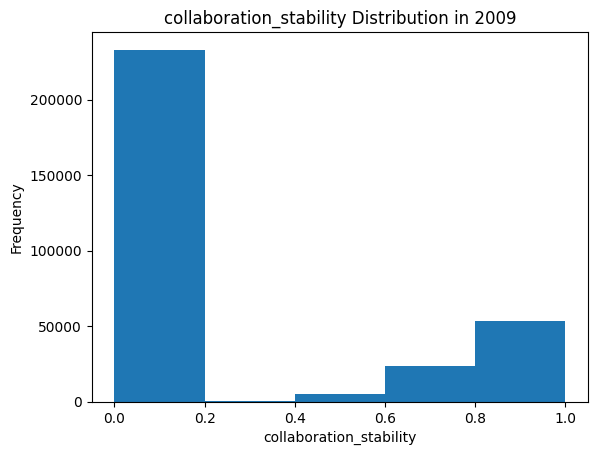

In [ ]:
import matplotlib.pyplot as plt

def plot_edge_feature_distribution(year, edge_feature_name, merged_network):
    edge_feature_values = []

    for merged_node_a, merged_node_b, edge_data in merged_network.edges(data=True):
        author_id_a, end_year_a = merged_node_a.split('_')
        author_id_b, end_year_b = merged_node_b.split('_')
        end_year = min(int(end_year_a), int(end_year_b))

        if end_year == year:
            edge_feature_values.append(edge_data[edge_feature_name])

    plt.hist(edge_feature_values, bins=5)
    plt.title(f"{edge_feature_name} Distribution in {year}")
    plt.xlabel(edge_feature_name)
    plt.ylabel("Frequency")
    plt.show()

# Example usage:
plot_edge_feature_distribution(2009, 'collaboration_stability', merged_network)

2010
71764


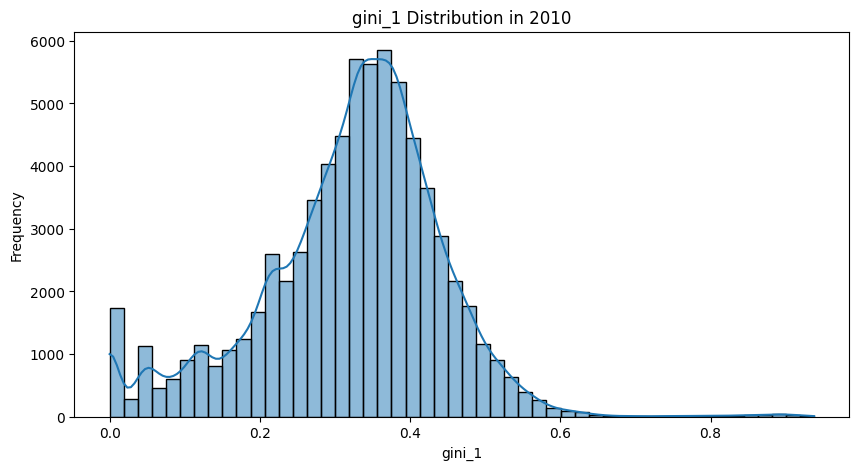

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_distribution(year, feature_name):
    print(year)
    node_ids_in_year = [node_id for node_id, data in merged_network.nodes(data=True) if node_id.split('_')[1] == year]
    feature_values = [merged_network.nodes[node_id][feature_name] for node_id in node_ids_in_year]
    print(len(node_ids_in_year))
    plt.figure(figsize=(10, 5))
    sns.histplot(feature_values, bins=50, kde=True)
    plt.title(f'{feature_name} Distribution in {year}')
    plt.xlabel(feature_name)
    plt.ylabel('Frequency')
    plt.show()

# 示例：绘制 2010 年的 'gini_6' 特征分布
plot_feature_distribution('2010', "gini_1")

**`add edge`**

merged_network.

In [ ]:
def calculate_coauthors(author_id, current_year):
    unique_coauthors = set()
    for coauthor_id in coauthor_dict[author_id]:
        for year, paper_ids in coauthor_dict[author_id][coauthor_id].items():
            if year <= current_year:
                unique_coauthors.add(coauthor_id)

    total_coauthors = len(unique_coauthors)
    return total_coauthors

In [ ]:
def find_target_authors(author_publication_sequence, career_age_5):
    target_authors = []
    for author_id, pub_seq in author_publication_sequence.items():
        start_year = min(pub_seq.keys())
        if career_age_5 == start_year + 4:
            end_year = max(pub_seq.keys())
            if end_year - start_year >= 14:
                start_year_15 = start_year + 14
                pub_count_15 = sum([pub_seq.get(year, 0) for year in range(start_year, start_year_15 + 1)])
                if pub_count_15 >= 10:
                    if calculate_coauthors(author_id,career_age_5)!=0:
                      target_authors.append(author_id)
    return target_authors

import networkx as nx
import gc

def extract_target_and_neighbors(network, target_nodes):
    nodes_to_keep = set(target_nodes)
    for node in target_nodes:
        neighbors = list(network.neighbors(node))
        nodes_to_keep.update(neighbors)
    
    subgraph = network.subgraph(nodes_to_keep)
    return subgraph

def merge_and_trim_networks(coauthor_networks, author_publication_sequence):
    merged_network = nx.Graph()
    target_authors_by_year = {}

    for year, network in coauthor_networks.items():
        career_age_5 = year
        target_authors = find_target_authors(author_publication_sequence, career_age_5)
        target_authors_by_year[year] = target_authors

        # 提取目标节点及其一阶邻居的子图
        subgraph = extract_target_and_neighbors(network, target_authors)

        # 为子图中的节点和边添加新的唯一标识符
        new_node_ids = {node: f"{node}_{year}" for node in subgraph.nodes()}
        subgraph = nx.relabel_nodes(subgraph, new_node_ids)
        print(f"Year: {year}, Target_Nodes:  {len(target_authors)}, Nodes: {len(subgraph.nodes)}, Edges: {len(subgraph.edges)}")
        # 将子图中的节点和边添加到 merged_network 中
        merged_network.add_nodes_from(subgraph.nodes(data=True))
        merged_network.add_edges_from(subgraph.edges(data=True))

    return merged_network, target_authors_by_year

# 使用更新后的函数
merged_network, target_authors_by_year = merge_and_trim_networks(coauthor_networks, author_publication_sequence)

Year: 1971, Target_Nodes:  23, Nodes: 92, Edges: 109
Year: 1972, Target_Nodes:  38, Nodes: 152, Edges: 191
Year: 1973, Target_Nodes:  51, Nodes: 194, Edges: 209
Year: 1974, Target_Nodes:  46, Nodes: 174, Edges: 209
Year: 1975, Target_Nodes:  71, Nodes: 323, Edges: 448
Year: 1976, Target_Nodes:  90, Nodes: 394, Edges: 542
Year: 1977, Target_Nodes:  138, Nodes: 623, Edges: 935
Year: 1978, Target_Nodes:  154, Nodes: 695, Edges: 1087
Year: 1979, Target_Nodes:  133, Nodes: 544, Edges: 766
Year: 1980, Target_Nodes:  183, Nodes: 755, Edges: 1040
Year: 1981, Target_Nodes:  204, Nodes: 894, Edges: 1260
Year: 1982, Target_Nodes:  166, Nodes: 766, Edges: 1166
Year: 1983, Target_Nodes:  232, Nodes: 1000, Edges: 1446
Year: 1984, Target_Nodes:  262, Nodes: 1101, Edges: 1743
Year: 1985, Target_Nodes:  329, Nodes: 1479, Edges: 2385
Year: 1986, Target_Nodes:  416, Nodes: 1972, Edges: 3353
Year: 1987, Target_Nodes:  498, Nodes: 2320, Edges: 3742
Year: 1988, Target_Nodes:  532, Nodes: 2588, Edges: 4257
Y

In [ ]:
# 输出目标作者数量（所有年份的目标作者总和）
all_target_authors = set()
for target_authors in target_authors_by_year.values():
    all_target_authors.update(target_authors)
print("目标作者数量：", len(all_target_authors))

目标作者数量： 92623


In [ ]:
graph = merged_network
print(f"Nodes: {graph.number_of_nodes()}, Edges: {graph.number_of_edges()}")

Nodes: 726152, Edges: 2494234


In [ ]:
def find_target_authors(author_publication_sequence, career_age_5):
    target_authors = []
    for author_id, pub_seq in author_publication_sequence.items():
        start_year = min(pub_seq.keys())
        if career_age_5 == start_year + 4:
            end_year = max(pub_seq.keys())
            if end_year - start_year >= 14:
                start_year_15 = start_year + 14
                pub_count_15 = sum([pub_seq.get(year, 0) for year in range(start_year, start_year_15 + 1)])
                if pub_count_15 >= 10:
                    if calculate_coauthors(author_id,career_age_5)!=0:
                      target_authors.append(author_id)
    return target_authors

import networkx as nx
import gc

def extract_target_and_neighbors(network, target_nodes):
    nodes_to_keep = set(target_nodes)
    for node in target_nodes:
        neighbors = list(network.neighbors(node))
        nodes_to_keep.update(neighbors)
    
    subgraph = network.subgraph(nodes_to_keep)
    return subgraph

def merge_and_trim_networks(coauthor_networks, author_publication_sequence):
    merged_network = nx.Graph()
    target_authors_by_year = {}

    for year, network in coauthor_networks.items():
        print(year)
        career_age_5 = year
        target_authors = find_target_authors(author_publication_sequence, career_age_5)
        print(len(target_authors))
        target_authors_by_year[year] = target_authors

        # 提取目标节点及其一阶邻居的子图
        subgraph = extract_target_and_neighbors(network, target_authors)

        # 将子图中的节点和边添加到 merged_network 中
        merged_network.add_nodes_from(subgraph.nodes(data=True))
  
        merged_network.add_edges_from(subgraph.edges(data=True))

    return merged_network, target_authors_by_year

# 使用更新后的函数
merged_network, target_authors_by_year = merge_and_trim_networks(coauthor_networks, author_publication_sequence)

1971
23
1972
38
1973
51
1974
46
1975
71
1976
90
1977
138
1978
154
1979
133
1980
183
1981
204
1982
166
1983
232
1984
262
1985
329
1986
416
1987
498
1988
532
1989
648
1990
767
1991
904
1992
1127
1993
1268
1994
1603
1995
1919
1996
2151
1997
2565
1998
2675
1999
3114
2000
3236
2001
3673
2002
4378
2003
4753
2004
5367
2005
5947
2006
6741
2007
7252
2008
8199
2009
8306
2010
7279
2011
5185


In [ ]:
# 输出目标作者数量（所有年份的目标作者总和）
all_target_authors = set()
for target_authors in target_authors_by_year.values():
    all_target_authors.update(target_authors)
print("目标作者数量：", len(all_target_authors))

目标作者数量： 92623


In [ ]:
import pickle

# 将Python对象保存到文件中
with open("/content/drive/MyDrive/GNNdataset/merged_network", "wb") as f:
    pickle.dump(merged_network, f)

In [ ]:
import pickle

# 将Python对象保存到文件中
with open("/content/drive/MyDrive/GNNdataset/target_authors_by_year", "wb") as f:
    pickle.dump(target_authors_by_year, f)

In [ ]:
graph = merged_network
year = 2011
print(f"Year: {year}, Nodes: {graph.number_of_nodes()}, Edges: {graph.number_of_edges()}")

Year: 2011, Nodes: 368266, Edges: 1449525


In [ ]:
for year, graph in coauthor_networks.items():
    print(f"Year: {year}, Nodes: {graph.number_of_nodes()}, Edges: {graph.number_of_edges()}")

Year: 1971, Nodes: 4322, Edges: 3968
Year: 1972, Nodes: 5024, Edges: 4600
Year: 1973, Nodes: 6054, Edges: 5516
Year: 1974, Nodes: 7745, Edges: 7391
Year: 1975, Nodes: 9295, Edges: 9026
Year: 1976, Nodes: 10820, Edges: 10903
Year: 1977, Nodes: 12501, Edges: 12876
Year: 1978, Nodes: 13680, Edges: 14555
Year: 1979, Nodes: 14623, Edges: 15565
Year: 1980, Nodes: 16011, Edges: 17491
Year: 1981, Nodes: 17699, Edges: 19992
Year: 1982, Nodes: 19892, Edges: 23013
Year: 1983, Nodes: 22770, Edges: 26903
Year: 1984, Nodes: 26337, Edges: 31726
Year: 1985, Nodes: 30213, Edges: 36844
Year: 1986, Nodes: 35453, Edges: 43363
Year: 1987, Nodes: 41186, Edges: 50741
Year: 1988, Nodes: 48840, Edges: 61232
Year: 1989, Nodes: 55967, Edges: 71999
Year: 1990, Nodes: 65868, Edges: 86682
Year: 1991, Nodes: 76743, Edges: 104392
Year: 1992, Nodes: 88243, Edges: 125173
Year: 1993, Nodes: 101214, Edges: 149796
Year: 1994, Nodes: 117904, Edges: 182422
Year: 1995, Nodes: 135100, Edges: 218405
Year: 1996, Nodes: 153234, 

In [ ]:
for year, graph in coauthor_networks.items():
    print(f"Year: {year}, Nodes: {graph.number_of_nodes()}, Edges: {graph.number_of_edges()}")

Year: 1971, Nodes: 4322, Edges: 3968
Year: 1972, Nodes: 5024, Edges: 4600
Year: 1973, Nodes: 6054, Edges: 5516
Year: 1974, Nodes: 7745, Edges: 7391
Year: 1975, Nodes: 9295, Edges: 9026
Year: 1976, Nodes: 10820, Edges: 10903
Year: 1977, Nodes: 12501, Edges: 12876
Year: 1978, Nodes: 13680, Edges: 14555
Year: 1979, Nodes: 14623, Edges: 15565
Year: 1980, Nodes: 16011, Edges: 17491
Year: 1981, Nodes: 17699, Edges: 19992
Year: 1982, Nodes: 19892, Edges: 23013
Year: 1983, Nodes: 22770, Edges: 26903
Year: 1984, Nodes: 26337, Edges: 31726
Year: 1985, Nodes: 30213, Edges: 36844
Year: 1986, Nodes: 35453, Edges: 43363
Year: 1987, Nodes: 41186, Edges: 50741
Year: 1988, Nodes: 48840, Edges: 61232
Year: 1989, Nodes: 55967, Edges: 71999
Year: 1990, Nodes: 65868, Edges: 86682
Year: 1991, Nodes: 76743, Edges: 104392
Year: 1992, Nodes: 88243, Edges: 125173
Year: 1993, Nodes: 101214, Edges: 149796
Year: 1994, Nodes: 117904, Edges: 182422
Year: 1995, Nodes: 135100, Edges: 218405
Year: 1996, Nodes: 153234, 

In [ ]:
import pickle

# 保存为二进制文件
with open('/content/drive/MyDrive/GNNdataset/5spancoauthor_networks.pickle', 'wb') as f:
    pickle.dump(coauthor_networks, f)

In [ ]:
author_id = '53f436e9dabfaee0d9b69698'  # Replace with a specific author ID
for year, graph in coauthor_networks.items():
    if author_id in graph:
        print(f"Year: {year}, Coauthors: {list(graph.neighbors(author_id))}")

Year: 2005, Coauthors: ['53f42ee3dabfaee43ebd7fa6', '5406dda3dabfae44f0864a8b', '5488826adabfae8a11fb438e', '53f43683dabfaec22ba82319', '53f446f9dabfaeecd69aecf8']
Year: 2006, Coauthors: ['53f42ee3dabfaee43ebd7fa6', '5406dda3dabfae44f0864a8b', '5488826adabfae8a11fb438e', '53f43683dabfaec22ba82319', '53f446f9dabfaeecd69aecf8']
Year: 2007, Coauthors: ['53f42ee3dabfaee43ebd7fa6', '5406dda3dabfae44f0864a8b', '5488826adabfae8a11fb438e', '53f43683dabfaec22ba82319', '53f446f9dabfaeecd69aecf8']
Year: 2008, Coauthors: ['53f42ee3dabfaee43ebd7fa6', '5406dda3dabfae44f0864a8b', '5488826adabfae8a11fb438e', '53f43683dabfaec22ba82319', '53f446f9dabfaeecd69aecf8', '53f45ba4dabfaee02ad6c2d3', '53f39e39dabfae4b34aa8ac6', '53f42c86dabfaee0d9af02e8']
Year: 2009, Coauthors: ['53f42ee3dabfaee43ebd7fa6', '5406dda3dabfae44f0864a8b', '5488826adabfae8a11fb438e', '53f43683dabfaec22ba82319', '53f446f9dabfaeecd69aecf8', '53f45ba4dabfaee02ad6c2d3', '53f39e39dabfae4b34aa8ac6', '53f42c86dabfaee0d9af02e8']
Year: 2010, 

In [ ]:
coauthor_dict[author_id]

{'53f42ee3dabfaee43ebd7fa6': {2005: ['53e99cdfb7602d9702590f06',
   '53e9b344b7602d9703e17599']},
 '5406dda3dabfae44f0864a8b': {2005: ['53e99cdfb7602d9702590f06',
   '53e9b344b7602d9703e17599'],
  2008: ['53e9a584b7602d9702eb113f',
   '53e9aa02b7602d970336e345',
   '53e9b3efb7602d9703edea95']},
 '5488826adabfae8a11fb438e': {2005: ['53e99cdfb7602d9702590f06',
   '53e9b344b7602d9703e17599'],
  2008: ['53e9a584b7602d9702eb113f',
   '53e9aa02b7602d970336e345',
   '53e9b3efb7602d9703edea95']},
 '53f43683dabfaec22ba82319': {2005: ['53e99cdfb7602d9702590f06',
   '53e9b344b7602d9703e17599']},
 '53f446f9dabfaeecd69aecf8': {2005: ['53e99cdfb7602d9702590f06',
   '53e9b344b7602d9703e17599']},
 '53f45ba4dabfaee02ad6c2d3': {2008: ['53e9a584b7602d9702eb113f',
   '53e9aa02b7602d970336e345',
   '53e9b3efb7602d9703edea95']},
 '53f39e39dabfae4b34aa8ac6': {2008: ['53e9a584b7602d9702eb113f',
   '53e9aa02b7602d970336e345']},
 '53f42c86dabfaee0d9af02e8': {2008: ['53e9aa02b7602d970336e345']}}

In [ ]:
for year, graph in coauthor_networks.items():
    num_connected_components = nx.number_connected_components(graph)
    print(f"Year: {year}, Number of connected components: {num_connected_components}")

Year: 1971, Number of connected components: 1561
Year: 1972, Number of connected components: 1786
Year: 1973, Number of connected components: 2117
Year: 1974, Number of connected components: 2609
Year: 1975, Number of connected components: 3047
Year: 1976, Number of connected components: 3426
Year: 1977, Number of connected components: 3873
Year: 1978, Number of connected components: 4093
Year: 1979, Number of connected components: 4282
Year: 1980, Number of connected components: 4565
Year: 1981, Number of connected components: 4898
Year: 1982, Number of connected components: 5347
Year: 1983, Number of connected components: 5966
Year: 1984, Number of connected components: 6725
Year: 1985, Number of connected components: 7526
Year: 1986, Number of connected components: 8724
Year: 1987, Number of connected components: 10029
Year: 1988, Number of connected components: 11565
Year: 1989, Number of connected components: 12645
Year: 1990, Number of connected components: 14350
Year: 1991, Numb

In [ ]:
def manually_build_network(year, coauthor_dict, time_span):
    graph = nx.Graph()
    
    for author_id, coauthors in coauthor_dict.items():
        for coauthor_id, collaboration_years in coauthors.items():
            collaborations_in_time_span = [y for y in collaboration_years if year - time_span + 1 <= y <= year]
            if collaborations_in_time_span:
                graph.add_edge(author_id, coauthor_id)
    
    return graph

def check_networks(coauthor_networks, coauthor_dict, time_span):
    for year, graph in coauthor_networks.items():
        expected_graph = manually_build_network(year, coauthor_dict, time_span)
        if not nx.is_isomorphic(graph, expected_graph):
            print(f"Networks for year {year} do not match.")
            return False
    
    print("All networks match.")
    return True

# Test the check_networks function
time_span = 5
result = check_networks(coauthor_networks, coauthor_dict, time_span)
print("Result:", result)

KeyboardInterrupt: ignored

In [ ]:
import pickle
with open('/content/drive/MyDrive/GNNdataset/5spancoauthor_networks_1971_to_2011.pickle', 'rb') as f:
    coauthor_networks = pickle.load(f)

In [ ]:
import pickle
with open('/content/drive/MyDrive/GNNdataset/5spancoauthor_networks_1971_to_2011.pickle', 'rb') as f:
    coauthor_networks = pickle.load(f)

In [ ]:
for year, graph in coauthor_networks.items():
    print(f"Year: {year}, Nodes: {graph.number_of_nodes()}, Edges: {graph.number_of_edges()}")

Year: 1971, Nodes: 7102, Edges: 6873
Year: 1972, Nodes: 8355, Edges: 8044
Year: 1973, Nodes: 10119, Edges: 9696
Year: 1974, Nodes: 12446, Edges: 12321
Year: 1975, Nodes: 14571, Edges: 14573
Year: 1976, Nodes: 16966, Edges: 17550
Year: 1977, Nodes: 19610, Edges: 20618
Year: 1978, Nodes: 22221, Edges: 23872
Year: 1979, Nodes: 25129, Edges: 27423
Year: 1980, Nodes: 28319, Edges: 31533
Year: 1981, Nodes: 31932, Edges: 36830
Year: 1982, Nodes: 36250, Edges: 42762
Year: 1983, Nodes: 41234, Edges: 49754
Year: 1984, Nodes: 47072, Edges: 57867
Year: 1985, Nodes: 53455, Edges: 66933
Year: 1986, Nodes: 61486, Edges: 78469
Year: 1987, Nodes: 70506, Edges: 91392
Year: 1988, Nodes: 82124, Edges: 108563
Year: 1989, Nodes: 94019, Edges: 127013
Year: 1990, Nodes: 108793, Edges: 150272
Year: 1991, Nodes: 125638, Edges: 178686
Year: 1992, Nodes: 143767, Edges: 211441
Year: 1993, Nodes: 165402, Edges: 251594
Year: 1994, Nodes: 190922, Edges: 301080
Year: 1995, Nodes: 218941, Edges: 357944
Year: 1996, Node

In [ ]:
author_id = '53f436e9dabfaee0d9b69698'  # Replace with a specific author ID
for year, graph in coauthor_networks.items():
    if author_id in graph:
        print(f"Year: {year}, Coauthors: {list(graph.neighbors(author_id))}")

Year: 2005, Coauthors: ['5406dda3dabfae44f0864a8b', '5488826adabfae8a11fb438e', '53f42ee3dabfaee43ebd7fa6', '53f43683dabfaec22ba82319', '53f446f9dabfaeecd69aecf8']
Year: 2006, Coauthors: ['5406dda3dabfae44f0864a8b', '5488826adabfae8a11fb438e', '53f42ee3dabfaee43ebd7fa6', '53f43683dabfaec22ba82319', '53f446f9dabfaeecd69aecf8']
Year: 2007, Coauthors: ['5406dda3dabfae44f0864a8b', '5488826adabfae8a11fb438e', '53f42ee3dabfaee43ebd7fa6', '53f43683dabfaec22ba82319', '53f446f9dabfaeecd69aecf8']
Year: 2008, Coauthors: ['5406dda3dabfae44f0864a8b', '5488826adabfae8a11fb438e', '53f42ee3dabfaee43ebd7fa6', '53f43683dabfaec22ba82319', '53f446f9dabfaeecd69aecf8', '53f45ba4dabfaee02ad6c2d3', '53f39e39dabfae4b34aa8ac6', '53f42c86dabfaee0d9af02e8']
Year: 2009, Coauthors: ['5406dda3dabfae44f0864a8b', '5488826adabfae8a11fb438e', '53f42ee3dabfaee43ebd7fa6', '53f43683dabfaec22ba82319', '53f446f9dabfaeecd69aecf8', '53f45ba4dabfaee02ad6c2d3', '53f39e39dabfae4b34aa8ac6', '53f42c86dabfaee0d9af02e8']
Year: 2010, 

In [ ]:
coauthor_networks_1971_to_2011 = {year: coauthor_networks[year] for year in range(1971, 2012)}

In [ ]:
len(coauthor_networks_1971_to_2011[1971].nodes)

7102

In [ ]:
import pickle

# 保存为二进制文件
with open('/content/drive/MyDrive/GNNdataset/5spancoauthor_networks_1971_to_2011.pickle', 'wb') as f:
    pickle.dump(coauthor_networks_1971_to_2011, f)

In [ ]:
coauthor_networks_2010[1945].nodes

NodeView(('53f44aeadabfaedf435deef8', '53f4ceb9dabfaeed1af820b7', '5405a981dabfae44f081e381', '53f45261dabfaedf435fbfd4'))

In [ ]:
coauthor_networks_2010[1945].adj

AdjacencyView({'53f44aeadabfaedf435deef8': {'53f4ceb9dabfaeed1af820b7': {}}, '53f4ceb9dabfaeed1af820b7': {'53f44aeadabfaedf435deef8': {}}, '5405a981dabfae44f081e381': {'53f45261dabfaedf435fbfd4': {}}, '53f45261dabfaedf435fbfd4': {'5405a981dabfae44f081e381': {}}})

In [ ]:
coauthor_networks_2010.update(coauthor_networks_2015)

In [ ]:
len(coauthor_networks_2010[2014].nodes)

1495099

In [ ]:
len(coauthor_networks_2015[2014].nodes)

1495099

In [ ]:
for k,v in coauthor_dict.items():
  print(k,v)

53f43776dabfaee0d9b6e75b {'53f45a12dabfaefedbb5d99c': {2011: ['53e9978ab7602d9701f458e1'], 2007: ['53e9978ab7602d9701f47e0d'], 2008: ['53e997e4b7602d9701fdc6a3'], 2013: ['53e99b63b7602d970240a190', '573696d46e3b12023e5d49eb', '573696d56e3b12023e5d5403'], 2006: ['53e9a22bb7602d9702b3156d'], 2009: ['53e9b815b7602d97043ce661'], 2015: ['55323b5d45cec66b6f9d9c74']}, '53f44115dabfaee4dc7c0d1b': {2006: ['53e9978ab7602d9701f4bc3a']}, '53f453c9dabfaefedbb471b2': {2005: ['53e99792b7602d9701f544e1', '53e9ab42b7602d97034d3797'], 2013: ['53e99b63b7602d970240a190', '53e9b289b7602d9703d31bbe'], 2004: ['53e99cb4b7602d9702564d7b'], 2008: ['53e9a1bdb7602d9702ab5136'], 2009: ['53e9a1d5b7602d9702acda26', '53e9b815b7602d97043ce661'], 2010: ['53e9aed1b7602d97038fbbc6'], 2006: ['53e9ba2db7602d9704638c63'], 2015: ['55323b5d45cec66b6f9d9c74']}, '53f45a41dabfaeb2ac0e4de9': {2006: ['53e99967b7602d97021aac25']}, '53f3a371dabfae4b34ac8f7a': {2006: ['53e99967b7602d97021aac25']}, '53f45f00dabfaedf4362a0fb': {2004: [

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




53f4338fdabfaeee2298e04e {'562e267a45cedb33990c09ee': {1993: ['557f07f0d19faf961d16e47f']}, '53f44dd1dabfaee4dc7ef1c7': {1993: ['557f07f0d19faf961d16e47f']}}
53f44dd1dabfaee4dc7ef1c7 {'562e267a45cedb33990c09ee': {1993: ['557f07f0d19faf961d16e47f']}, '53f4338fdabfaeee2298e04e': {1993: ['557f07f0d19faf961d16e47f']}}
562e30f345cedb33990f3c5b {'53f4350fdabfaeb22f465d3c': {1993: ['557f5787d19faf961d1707f9']}, '53f47430dabfaedd74ea042f': {1993: ['557f5787d19faf961d1707f9']}, '562ccc9545cedb3398cca2bf': {1993: ['557f5787d19faf961d1707f9']}, '562ccc9545cedb3398cca2c2': {1993: ['557f5787d19faf961d1707f9']}}
53f4350fdabfaeb22f465d3c {'562e30f345cedb33990f3c5b': {1993: ['557f5787d19faf961d1707f9']}, '53f47430dabfaedd74ea042f': {1993: ['557f5787d19faf961d1707f9'], 1996: ['53e9a4ecb7602d9702e0f31d'], 2005: ['53e9b4fab7602d970402abf0'], 1995: ['53e9b839b7602d97043fa3f1']}, '562ccc9545cedb3398cca2bf': {1993: ['557f5787d19faf961d1707f9']}, '562ccc9545cedb3398cca2c2': {1993: ['557f5787d19faf961d1707f9

KeyboardInterrupt: ignored

In [ ]:
import networkx as nx
from collections import defaultdict

# Initialize a dictionary for storing the coauthor networks with 5-year time spans
coauthor_networks = defaultdict(nx.Graph)

# Define the time span length
time_span = 5

# Iterate over the sorted years in coauthor_dict
sorted_years = sorted({year for coauthors in coauthor_dict.values() for collaboration_years in coauthors.values() for year in collaboration_years.keys()})
current_year_graph = nx.Graph()

for year in sorted_years:
    if year <=2010:
        continue
    if year == 0:
        continue
    if year > 2014:
        break
    print(year)
    # Calculate the start year for the time span
    start_year = year - time_span + 1

    # Iterate over the coauthor_dict
    for author_id, coauthors in coauthor_dict.items():
        # Check if the author published a paper within the current time span
        author_published_in_time_span = any(start_year <= y <= year for collaboration_years in coauthors.values() for y in collaboration_years.keys())
        if author_published_in_time_span:
            # Add the author to the current_year_graph
            current_year_graph.add_node(author_id)

    # Iterate over the coauthor_dict again to add edges
    for author_id, coauthors in coauthor_dict.items():
        for coauthor_id, collaboration_years in coauthors.items():
            # Check if they collaborated within the current time span
            collaborations_in_time_span = [y for y in collaboration_years if start_year <= y <= year]
            if collaborations_in_time_span:
                # Add the edge to the current_year_graph
                current_year_graph.add_edge(author_id, coauthor_id)

    # Store the current_year_graph in coauthor_networks
    coauthor_networks[year] = current_year_graph.copy()

# Convert defaultdict to a regular dictionary
coauthor_networks = dict(coauthor_networks)

2011
2012
2013
2014


In [ ]:
import pickle

# 保存为二进制文件
with open('/content/drive/MyDrive/GNNdataset/5spancoauthor_networks.pickle', 'wb') as f:
    pickle.dump(coauthor_networks_2010, f)

In [ ]:
len(coauthor_networks[2010].nodes)

1408344

In [ ]:
coauthor_networks[2010].adj

In [ ]:
coauthor_networks[1941]

In [ ]:
import networkx as nx
from collections import defaultdict

# Initialize a dictionary for storing the coauthor networks with 5-year time spans
coauthor_networks = defaultdict(nx.Graph)

# Define the time span length
time_span = 5

# Iterate over the sorted years in coauthor_dict
sorted_years = sorted({year for coauthors in coauthor_dict.values() for collaboration_years in coauthors.values() for year in collaboration_years.keys()})
for year in sorted_years:
    print(year)
    if year > 2013:
        break

    # Initialize an empty Graph for the current time span
    current_year_graph = nx.Graph()

    # Calculate the start year for the time span
    start_year = year - time_span + 1

    # Iterate over the coauthor_dict
    for author_id, coauthors in coauthor_dict.items():
        # Add the author to the current_year_graph
        current_year_graph.add_node(author_id)

        # Iterate over each author's coauthors
        for coauthor_id, collaboration_years in coauthors.items():
            # Add the coauthor to the current_year_graph
            current_year_graph.add_node(coauthor_id)

            # Check if they collaborated within the current time span
            collaborations_in_time_span = [y for y in collaboration_years if start_year <= y <= year]
            if collaborations_in_time_span:
                # Add the edge to the current_year_graph
                current_year_graph.add_edge(author_id, coauthor_id)

    # Store the current_year_graph in coauthor_networks
    coauthor_networks[year] = current_year_graph

# Convert defaultdict to a regular dictionary
coauthor_networks = dict(coauthor_networks)

0
1940
1945
1946
1947
1948
1949
1950


In [ ]:
import networkx as nx
from collections import defaultdict

# Initialize a dictionary for storing the cumulative coauthor networks
coauthor_networks = defaultdict(nx.Graph)

# Initialize an empty Graph for the previous year
prev_year_graph = nx.Graph()

# Iterate over the sorted years in coauthor_dict
sorted_years = sorted({year for coauthors in coauthor_dict.values() for collaboration_years in coauthors.values() for year in collaboration_years.keys()})
for year in sorted_years:
    if year > 2013:
        break
    print(year)

    # Copy the graph from the previous year
    current_year_graph = prev_year_graph.copy()

    # Iterate over the coauthor_dict
    for author_id, coauthors in coauthor_dict.items():
        # Add the author to the current_year_graph
        current_year_graph.add_node(author_id)

        # Iterate over each author's coauthors
        for coauthor_id, collaboration_years in coauthors.items():
            # Add the coauthor to the current_year_graph
            current_year_graph.add_node(coauthor_id)

            # Check if they collaborated in the current year or before
            past_collaborations = [y for y in collaboration_years if y <= year]
            if past_collaborations:
                # Add the edge to the current_year_graph
                current_year_graph.add_edge(author_id, coauthor_id)

    # Store the current_year_graph in coauthor_networks
    coauthor_networks[year] = current_year_graph

    # Set prev_year_graph to the current_year_graph
    prev_year_graph = current_year_graph

# Convert defaultdict to a regular dictionary
coauthor_networks = dict(coauthor_networks)

0
1940
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954


In [ ]:
sorted_years

[0,
 1940,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024]

In [ ]:
# Convert defaultdict to a regular dictionary
len(coauthor_networks[2012].nodes),len(coauthor_networks[2012].adj)

(1721476, 1721476)

In [ ]:
import pickle
with open('/content/drive/MyDrive/GNNdataset/coauthor_networks.pickle', 'rb') as f:
    coauthor_networks = pickle.load(f)

In [ ]:
import pickle
with open('/content/drive/MyDrive/GNNdataset/coauthor_dict.pickle', 'rb') as f:
    coauthor_dict = pickle.load(f)

In [ ]:
# 保存为二进制文件
with open('/content/drive/MyDrive/GNNdataset/author_publication_sequence.pickle', 'rb') as f:
    author_publication_sequence = pickle.load(f)

In [ ]:
import networkx as nx
from collections import defaultdict

# Initialize a dictionary for storing the cumulative coauthor networks
coauthor_networks = defaultdict(nx.Graph)

# Initialize an empty Graph for the previous year
prev_year_graph = nx.Graph()

# Function to get the last active year of an author
def get_last_active_year(author_id, author_publication_sequence):
    return max(author_publication_sequence[author_id].keys()) if author_id in author_publication_sequence else -1

# Iterate over the sorted years in coauthor_dict
sorted_years = sorted({year for coauthors in coauthor_dict.values() for collaboration_years in coauthors.values() for year in collaboration_years.keys()})
for year in sorted_years:
    print(year)
    if year == 0:
      continue
    if year>=2022:
      continue
    # Copy the graph from the previous year
    current_year_graph = prev_year_graph.copy()

    # Iterate over the coauthor_dict
    for author_id, coauthors in coauthor_dict.items():
        # Iterate over each author's coauthors
        for coauthor_id, collaboration_years in coauthors.items():
            # Check if they collaborated in the current year
            if year in collaboration_years:
                # Add the edge to the current_year_graph
                current_year_graph.add_edge(author_id, coauthor_id)

    # Remove nodes that are not active in the current year
    inactive_nodes = [node for node in current_year_graph.nodes() if year > get_last_active_year(node, author_publication_sequence)]
    current_year_graph.remove_nodes_from(inactive_nodes)

    # Store the current_year_graph in coauthor_networks
    coauthor_networks[year] = current_year_graph

    # Set prev_year_graph to the current_year_graph
    prev_year_graph = current_year_graph

# Convert defaultdict to a regular dictionary
coauthor_networks = dict(coauthor_networks)

0
1940
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024


In [ ]:
len(coauthor_networks[2018].nodes)

464066

In [ ]:
len(coauthor_networks[2018].adj)

464066

In [ ]:
import pickle

# 保存为二进制文件
with open('/content/drive/MyDrive/GNNdataset/coauthor_networks_with_features.pickle', 'wb') as f:
    pickle.dump(coauthor_networks, f)